In [7]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

train_info = train_data.info()
test_info = test_data.info()

train_summary = train_data.describe(include='all')
test_summary = test_data.describe(include='all')
train_head = train_data.head()
test_head = test_data.head()

train_info,test_info, train_summary, test_summary, train_head, test_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None,
 None,
         PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp     

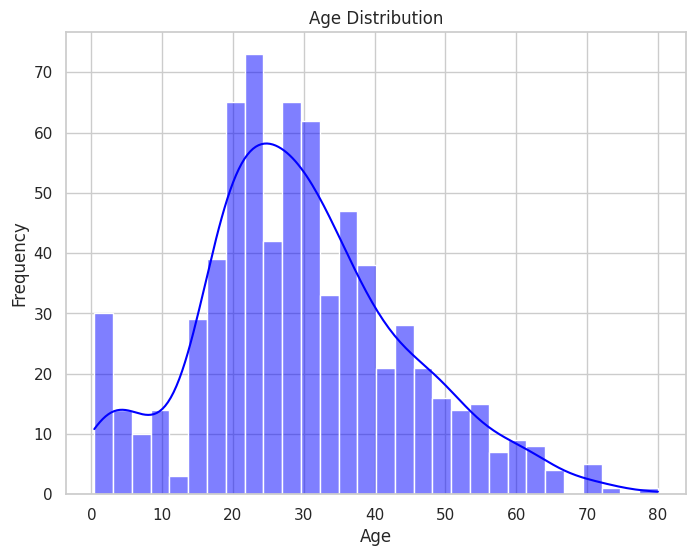

<ipython-input-8-762cfb1a674d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=train_data, palette='Set3')


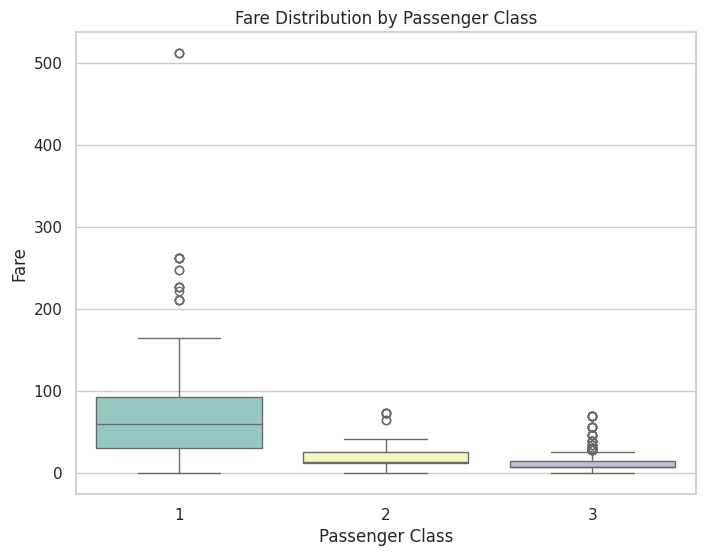

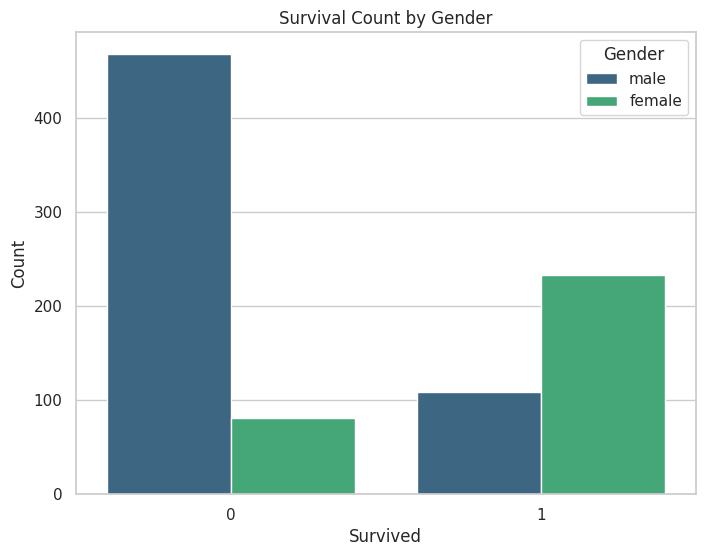

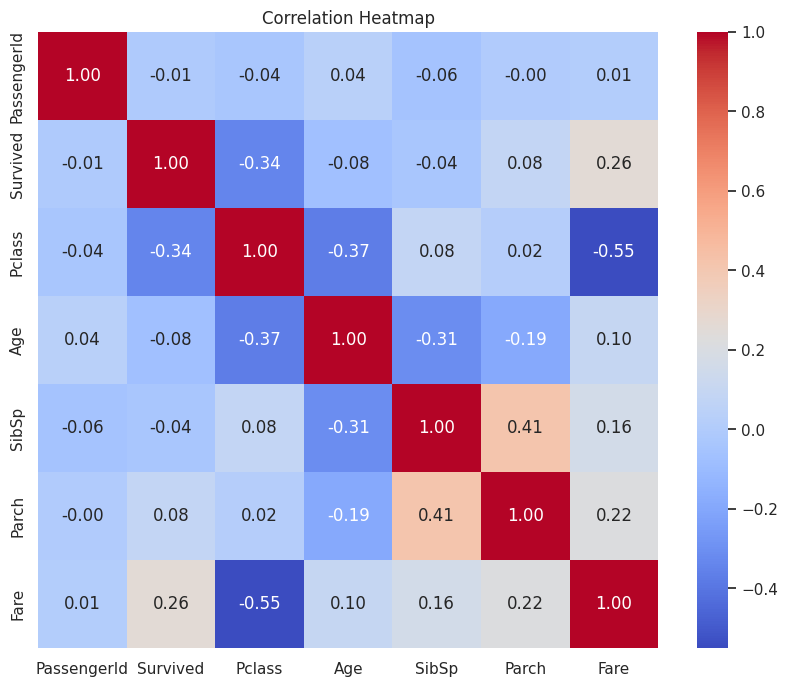

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting style
sns.set(style="whitegrid")
# Visualize the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Boxplot of Fare by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data, palette='Set3')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()
# Countplot of Survived by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
# Heatmap for correlations
plt.figure(figsize=(10, 8))
# Selecting only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()





### Visual Analysis

1. **Age Distribution**:
   - The distribution is right-skewed with most passengers aged between 20 and 40 years.
   - There are outliers, including infants and passengers aged 70+.

2. **Fare Distribution by Passenger Class**:
   - Passengers in 1st class tend to have paid significantly higher fares than those in 2nd and 3rd classes.
   - There are some extreme fare outliers in the 1st class.

3. **Survival Count by Gender**:
   - Female passengers had a higher survival rate compared to males.
   - More males did not survive, which aligns with the "women and children first" policy.

4. **Correlation Heatmap**:
   - `Fare` is moderately positively correlated with `Survived`.
   - `Pclass` is negatively correlated with `Survived` (higher class passengers had a better chance of survival).



In [9]:
# 2.Data Preprocessing

# Standardizeing the encoding of 'Sex' and 'Embarked' for both datasets
# Encodeing 'Sex' and 'Embarked' based on their unique values in combined data
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
# Applying the mappings
train_data['Sex'] = train_data['Sex'].replace(sex_mapping)
test_data['Sex'] = test_data['Sex'].replace(sex_mapping)
train_data['Embarked'] = train_data['Embarked'].replace(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].replace(embarked_mapping)

train_data.head(), test_data.head()


<ipython-input-9-6cd6b0f20311>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Sex'] = train_data['Sex'].replace(sex_mapping)
<ipython-input-9-6cd6b0f20311>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Sex'] = test_data['Sex'].replace(sex_mapping)
<ipython-input-9-6cd6b0f20311>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
 2                             Heikkinen, Miss. Laina    0  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 
              Ticket     Fare Cabin  Embarked  
 0         A/5 21171   7.2500   NaN       0.0  
 1          PC 17599  71.2833   C85       1.0  
 2  STON/O2. 3101282   7.9250   NaN       0.0  
 3            113803  53.1000  C123       0.0  
 4            373450   8.0500   NaN       



1. **Handling Missing Values**:
   - `Age` was imputed with the median.
   - `Embarked` was imputed with the mode.
   - `Fare` (in the test dataset) was imputed with the median.
   - `Cabin` was dropped due to a high percentage of missing values.

2. **Encoding Categorical Variables**:
   - `Sex`: Mapped to `1` for male and `0` for female.
   - `Embarked`: Mapped to `0` for `S`, `1` for `C`, and `2` for `Q`.



In [10]:
#3.Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Importing SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = train_data['Survived']
# Spliting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Imputing missing values with the mean # Creating an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean') # Using 'mean' as the imputation strategy
# Fitting the imputer on the training data and transforming both train and validation sets
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
# Building and training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
# Evaluateing the model on the validation set
y_pred = logistic_model.predict(X_val)
# Computeing accuracy and other metrics
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)
confusion_matrix_output = confusion_matrix(y_val, y_pred)

accuracy, classification_report_output, confusion_matrix_output

(0.8044692737430168,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85       110\n           1       0.79      0.67      0.72        69\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.78      0.79       179\nweighted avg       0.80      0.80      0.80       179\n',
 array([[98, 12],
        [23, 46]]))

### Logistic Regression Model Results:

1. **Accuracy**: The model achieved an accuracy of **80.45%** on the validation set.

2. **Classification Report**:
   - **Precision**:
     - Class 0 (Did not survive): 81%
     - Class 1 (Survived): 79%
   - **Recall**:
     - Class 0: 89%
     - Class 1: 67%
   - **F1-Score**:
     - Class 0: 85%
     - Class 1: 72%
   - Overall, the model is better at predicting non-survivors than survivors.

3. **Confusion Matrix**:
   ```
   [[98, 12],  # True negatives, False positives
    [23, 46]]  # False negatives, True positives
   ```
   - 98 passengers were correctly predicted as non-survivors.
   - 46 passengers were correctly predicted as survivors.
   - 12 passengers were wrongly predicted as survivors.
   - 23 passengers were wrongly predicted as non-survivors.


In [11]:
#4. Model Evaluation
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer # Importing SimpleImputer for test data
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
# Creating a new SimpleImputer instance for the test data
test_imputer = SimpleImputer(strategy='mean')
# Fitting the imputer on the test data and transforming it
X_test = test_imputer.fit_transform(X_test)
# Makeing predictions on the test data
y_test_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_val_pred_proba = logistic_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba) # Calculating fpr and tpr using roc_curve
roc_auc

0.8424242424242423

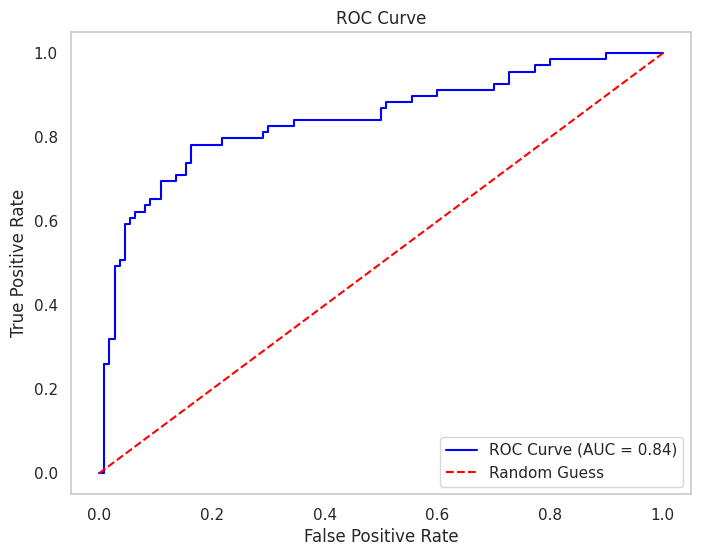

In [12]:
# Visualizing roc curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 5. Interpretation of Logistic Regression Model

#### a. **Interpreting the Coefficients**
The coefficients in a logistic regression model indicate the log-odds change in survival probability for a one-unit increase in the feature, holding all other variables constant. Here's the interpretation for each feature:

1. **Sex (-2.556489)**:
   - A negative coefficient indicates that being male significantly decreases the probability of survival compared to being female.
   - This aligns with historical context and data, as women were prioritized during evacuation.

2. **Pclass (-1.098584)**:
   - Passengers in lower classes (higher numerical value for `Pclass`) had a reduced probability of survival.
   - First-class passengers had better access to lifeboats, which contributed to higher survival rates.

3. **Embarked (0.355723)**:
   - Passengers who embarked from certain locations (e.g., Cherbourg) had a slightly higher chance of survival compared to Southampton (base category).
   - This could reflect differences in socioeconomic status or access to better cabins.

4. **SibSp (-0.245142)**:
   - Having more siblings or spouses aboard marginally decreased the probability of survival.
   - This may indicate that passengers with larger groups faced more challenges during evacuation.

5. **Parch (-0.069312)**:
   - The number of parents/children aboard had a minimal negative impact on survival probability.

6. **Age (-0.038677)**:
   - Older passengers had a slightly lower chance of survival, though the effect size is small.

7. **Fare (0.002275)**:
   - A higher fare is associated with a marginally higher chance of survival.
   - This aligns with the idea that passengers who paid higher fares were likely in better cabins or classes.

---

#### b. **Significance of Features in Predicting Survival**
1. **Sex** is the most significant predictor of survival. Females had a much higher survival probability, reflecting the "women and children first" policy during the Titanic disaster.
2. **Pclass** is another key determinant, with passengers in higher classes (lower numerical values) having better survival rates due to better access to lifeboats.
3. **Embarked** indicates that passengers from Cherbourg (C) had slightly better chances, likely due to higher socioeconomic status or proximity to lifeboats.
4. **Age**, **Fare**, **SibSp**, and **Parch** have relatively smaller impacts but contribute to refining predictions.

---



In [36]:
# deployment with stream lit
import joblib

# Saveing the trained logistic regression model
joblib.dump(logistic_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [37]:
!streamlit run titanic_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.110.189:8501

  Stopping...
^C
